### Unsupervised learning on EDGE-IIOT-2022

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score

In [ ]:
data = pd.read_csv('ML-Edge_IIoT_2022-dataset.csv', low_memory=False)
data.drop('Attack_type', axis =1)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 157800 entries, 0 to 157799
Data columns (total 63 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   frame.time                 157800 non-null  object 
 1   ip.src_host                157800 non-null  object 
 2   ip.dst_host                157800 non-null  object 
 3   arp.dst.proto_ipv4         157800 non-null  object 
 4   arp.opcode                 157800 non-null  float64
 5   arp.hw.size                157800 non-null  float64
 6   arp.src.proto_ipv4         157800 non-null  object 
 7   icmp.checksum              157800 non-null  float64
 8   icmp.seq_le                157800 non-null  float64
 9   icmp.transmit_timestamp    157800 non-null  float64
 10  icmp.unused                157800 non-null  float64
 11  http.file_data             157800 non-null  object 
 12  http.content_length        157800 non-null  float64
 13  http.request.uri.query     15

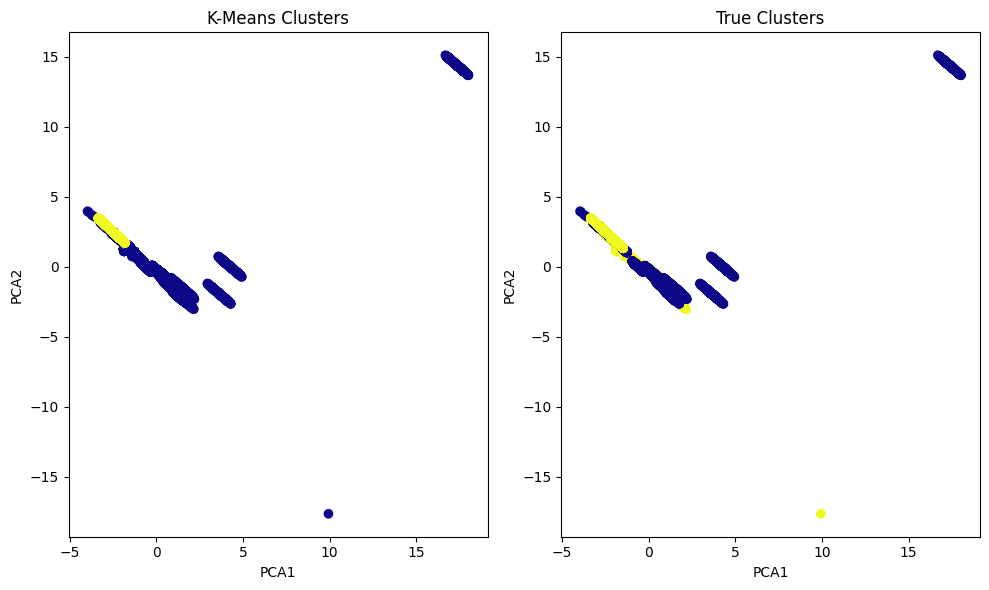

              precision    recall  f1-score   support

           0       0.00      0.00      0.00     24301
           1       0.83      0.88      0.86    133499

    accuracy                           0.75    157800
   macro avg       0.41      0.44      0.43    157800
weighted avg       0.70      0.75      0.72    157800



In [10]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report

is_numeric = data.dtypes.apply(lambda x: pd.api.types.is_numeric_dtype(x))

# Drop columns that are not numeric
df_filtered = data.loc[:, is_numeric]

true_labels = [i for i in df_filtered['Attack_label']]
df_filtered = df_filtered.drop(['Attack_label'], axis = 1)

# Preprocessing: Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_filtered)

# Perform K-means clustering
kmeans = KMeans(n_clusters=2, random_state=42)
kmeans.fit(data_scaled)

# Get cluster labels
pred_labels = kmeans.labels_
flipped_pred_labels = [(1-i) for i in pred_labels]
#visualise with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))  

# Plot for K-Means clusters
axes[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=pred_labels, cmap='plasma')
axes[0].set_title('K-Means Clusters')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# Plot for True clusters
axes[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=true_labels, cmap='plasma')
axes[1].set_title('True Clusters')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

print(classification_report(true_labels, flipped_pred_labels))

In [1]:
from sklearn.cluster import DBSCAN

eps_values = np.linspace(0.1,1, num = 5)
samples = [1000*i for i in range(1,6)]

for e in eps_values:
    for s in samples:
        dbscan = DBSCAN(eps=e, min_samples=s, metric='euclidean')  # Adjust eps and min_samples as needed
        labels = dbscan.fit_predict(data_scaled)

        # Print cluster labels and number of clusters
        print(f"epsilon {e}, samples: {s}")
        print(f"Cluster labels: {np.unique(labels)}")
        print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)} (excluding noise)")

NameError: name 'np' is not defined

In [6]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.3, min_samples=1500, metric='euclidean')  
labels = dbscan.fit_predict(data_scaled)

print(f"Cluster labels: {np.unique(labels)}")
print(f"Number of clusters found: {len(set(labels)) - (1 if -1 in labels else 0)} (excluding noise)")

Cluster labels: [-1  0  1]
Number of clusters found: 2 (excluding noise)


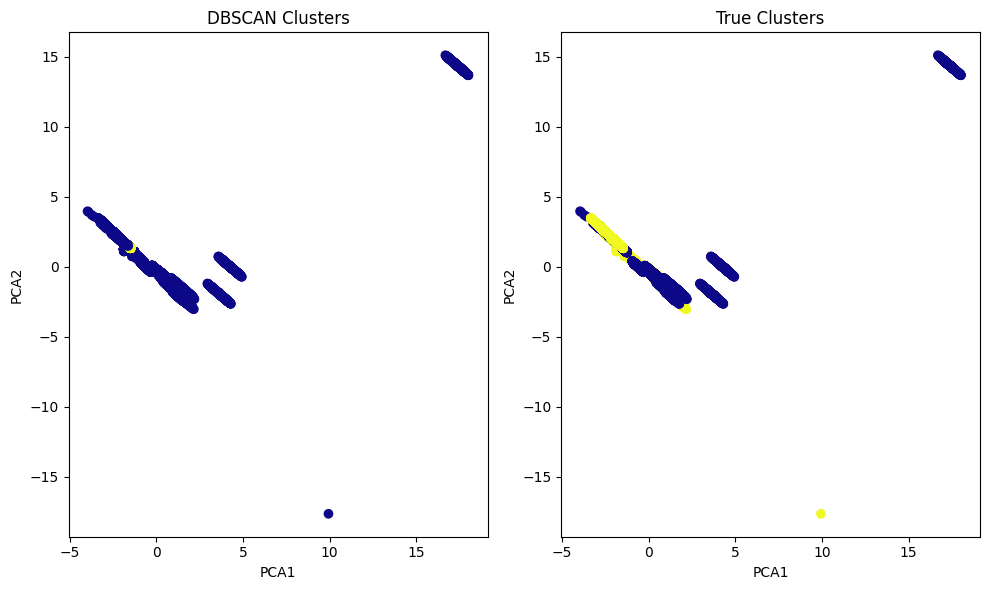

              precision    recall  f1-score   support

           0       0.02      0.00      0.00     24301
           1       0.84      0.97      0.90    133499

    accuracy                           0.82    157800
   macro avg       0.43      0.49      0.45    157800
weighted avg       0.72      0.82      0.76    157800



In [8]:
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_scaled)

#convert data classified as noise to normal traffic
for i in range(len(labels)):
    if labels[i] == -1:
        labels[i] = 1
#flip prediction labels
flipped_labels = [1-i for i in labels]

#visualise with PCA
pca = PCA(n_components=2)
reduced_features = pca.fit_transform(data_scaled)

fig, axes = plt.subplots(1, 2, figsize=(10, 6))  

# Plot for K-Means clusters
axes[0].scatter(reduced_features[:, 0], reduced_features[:, 1], c=flipped_labels, cmap='plasma')
axes[0].set_title('DBSCAN Clusters')
axes[0].set_xlabel('PCA1')
axes[0].set_ylabel('PCA2')

# Plot for True clusters
axes[1].scatter(reduced_features[:, 0], reduced_features[:, 1], c=true_labels, cmap='plasma')
axes[1].set_title('True Clusters')
axes[1].set_xlabel('PCA1')
axes[1].set_ylabel('PCA2')

plt.tight_layout()
plt.show()

print(classification_report(true_labels, labels))